# Setting Up Spark Session

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=467783c9666e51f6984c7fb9bb47a09b3d6309e1ca5650cfee17938017a6f4f4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("InsurancePricePrediction").getOrCreate()

In [3]:
spark

# Importing the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [5]:
# Load the Dataset
file_path = "/content/new_insurance_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [6]:
# Show schema and first few rows
data.printSchema()
data.show(5)

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- Claim_Amount: double (nullable = true)
 |-- past_consultations: integer (nullable = true)
 |-- num_of_steps: integer (nullable = true)
 |-- Hospital_expenditure: double (nullable = true)
 |-- NUmber_of_past_hospitalizations: integer (nullable = true)
 |-- Anual_Salary: double (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)

+---+----+-----+--------+------+------------+------------------+------------+--------------------+-------------------------------+-------------+---------+---------+
|age| sex|  bmi|children|smoker|Claim_Amount|past_consultations|num_of_steps|Hospital_expenditure|NUmber_of_past_hospitalizations| Anual_Salary|   region|  charges|
+---+----+-----+--------+------+------------+------------------+------------+--------------------+----

In [7]:
print((data.count(), len(data.columns)))

(1338, 13)


In [8]:
data.describe().show()

+-------+------------------+------+------------------+------------------+------+------------------+------------------+-----------------+--------------------+-------------------------------+--------------------+---------+------------------+
|summary|               age|   sex|               bmi|          children|smoker|      Claim_Amount|past_consultations|     num_of_steps|Hospital_expenditure|NUmber_of_past_hospitalizations|        Anual_Salary|   region|           charges|
+-------+------------------+------+------------------+------------------+------+------------------+------------------+-----------------+--------------------+-------------------------------+--------------------+---------+------------------+
|  count|              1329|  1338|              1335|              1333|  1338|              1324|              1332|             1335|                1334|                           1336|                1332|     1338|              1338|
|   mean| 39.31000752445448|  NULL|30.66

In [9]:
from pyspark.sql.functions import col, sum

In [10]:
# Count missing values in each column
missing_values = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
missing_values.show()

+---+---+---+--------+------+------------+------------------+------------+--------------------+-------------------------------+------------+------+-------+
|age|sex|bmi|children|smoker|Claim_Amount|past_consultations|num_of_steps|Hospital_expenditure|NUmber_of_past_hospitalizations|Anual_Salary|region|charges|
+---+---+---+--------+------+------------+------------------+------------+--------------------+-------------------------------+------------+------+-------+
|  9|  0|  3|       5|     0|          14|                 6|           3|                   4|                              2|           6|     0|      0|
+---+---+---+--------+------+------------+------------------+------------+--------------------+-------------------------------+------------+------+-------+



In [12]:
# Handle missing values - for simplicity, we'll drop rows with null values
data = data.na.drop()

In [29]:
# Display basic statistics of numerical columns
data.describe().show()

# Count the number of missing values per column
from pyspark.sql.functions import isnan, when, count, col

data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()


+-------+------------------+------+------------------+------------------+------+------------------+------------------+-----------------+--------------------+-------------------------------+-------------------+---------+------------------+
|summary|               age|   sex|               bmi|          children|smoker|      Claim_Amount|past_consultations|     num_of_steps|Hospital_expenditure|NUmber_of_past_hospitalizations|       Anual_Salary|   region|           charges|
+-------+------------------+------+------------------+------------------+------+------------------+------------------+-----------------+--------------------+-------------------------------+-------------------+---------+------------------+
|  count|              1287|  1287|              1287|              1287|  1287|              1287|              1287|             1287|                1287|                           1287|               1287|     1287|              1287|
|   mean| 39.41958041958042|  NULL|30.655745

In [31]:
# Count the frequency of each category in categorical columns
data.groupBy("sex").count().show()
data.groupBy("smoker").count().show()
data.groupBy("region").count().show()


+------+-----+
|   sex|count|
+------+-----+
|female|  648|
|  male|  639|
+------+-----+

+------+-----+
|smoker|count|
+------+-----+
|    no| 1023|
|   yes|  264|
+------+-----+

+---------+-----+
|   region|count|
+---------+-----+
|northwest|  314|
|southeast|  347|
|northeast|  316|
|southwest|  310|
+---------+-----+



In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas DataFrame for plotting
pandas_data = data.toPandas()


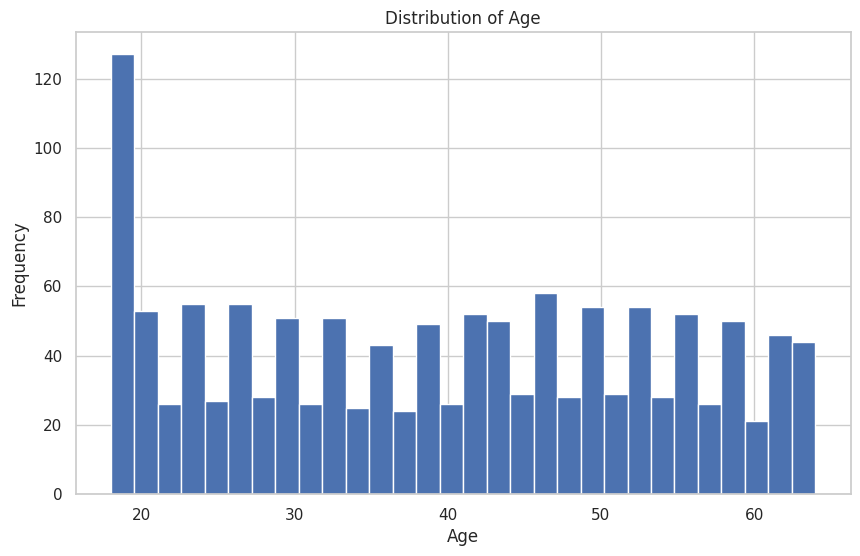

In [35]:
#age distribution
plt.figure(figsize=(10, 6))
pandas_data['age'].hist(bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


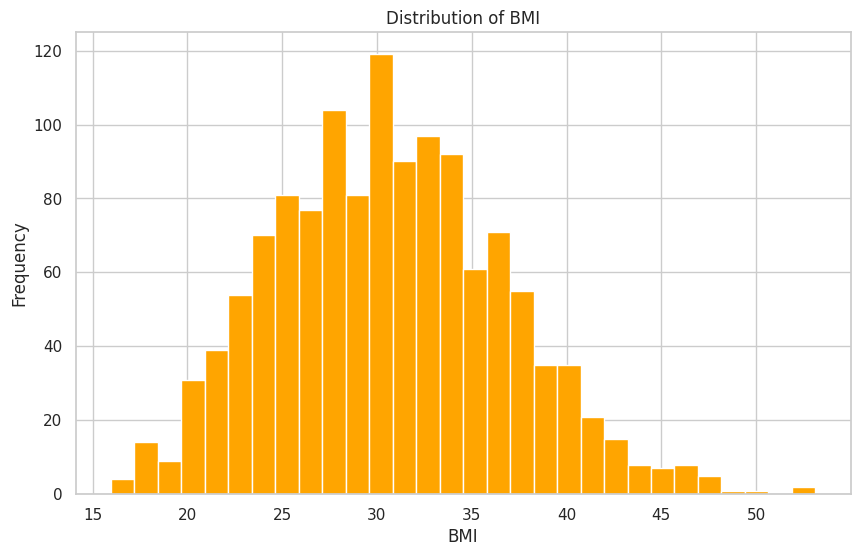

In [37]:
#BMI Distribution
plt.figure(figsize=(10, 6))
pandas_data['bmi'].hist(bins=30, color='orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

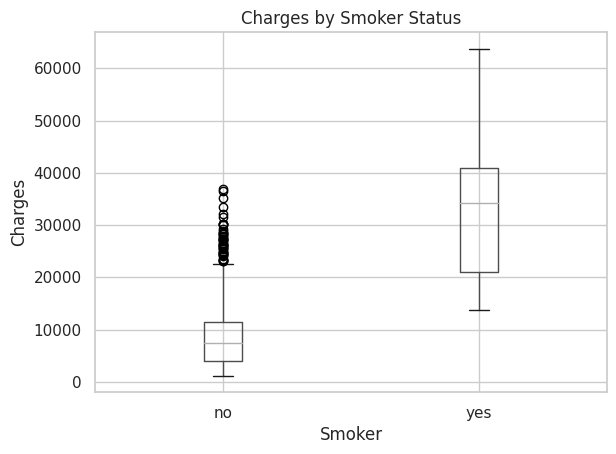

In [38]:
#Charges vs. Smoker Status
plt.figure(figsize=(10, 6))
pandas_data.boxplot(column='charges', by='smoker')
plt.title('Charges by Smoker Status')
plt.suptitle('')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


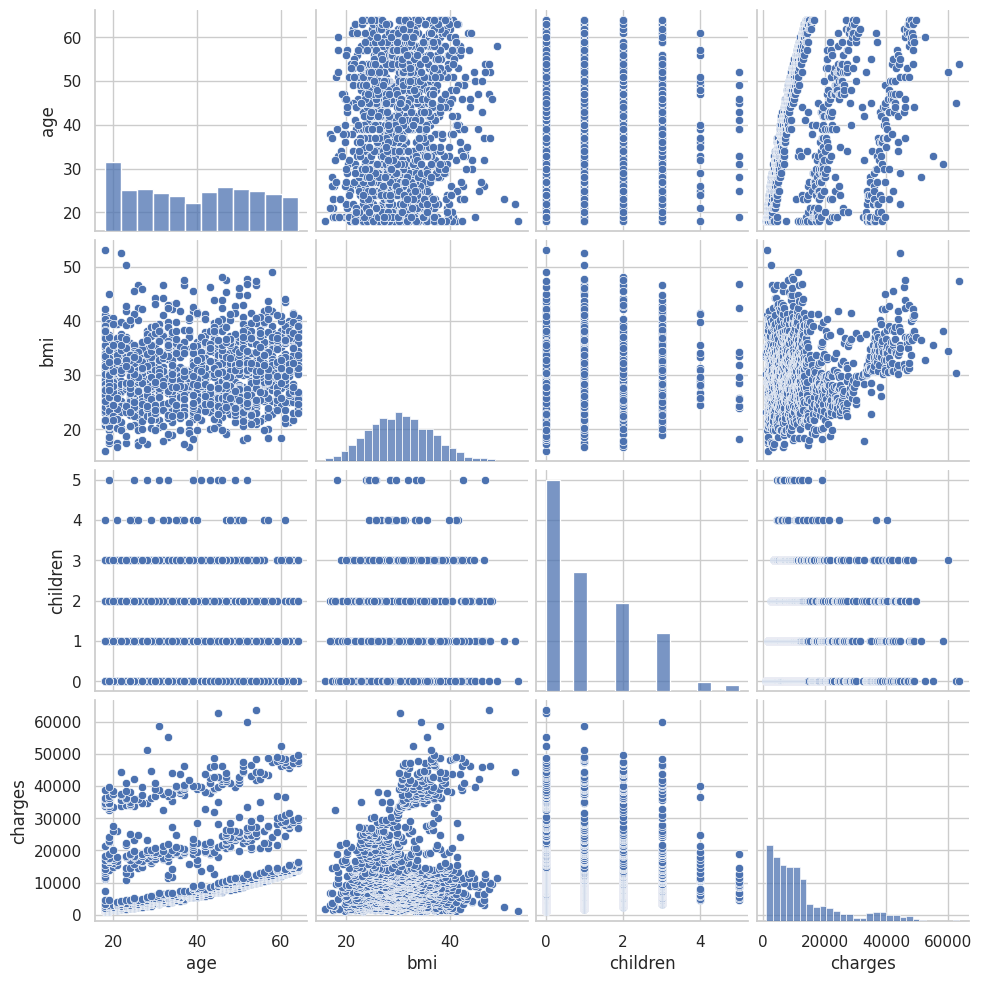

In [40]:
#Pairplot of Numerical Features
#This is particularly useful to see the relationships between numerical features and the target variable.
import seaborn as sns

# Select a subset of numerical columns for the pairplot
numerical_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(pandas_data[numerical_features])
plt.show()


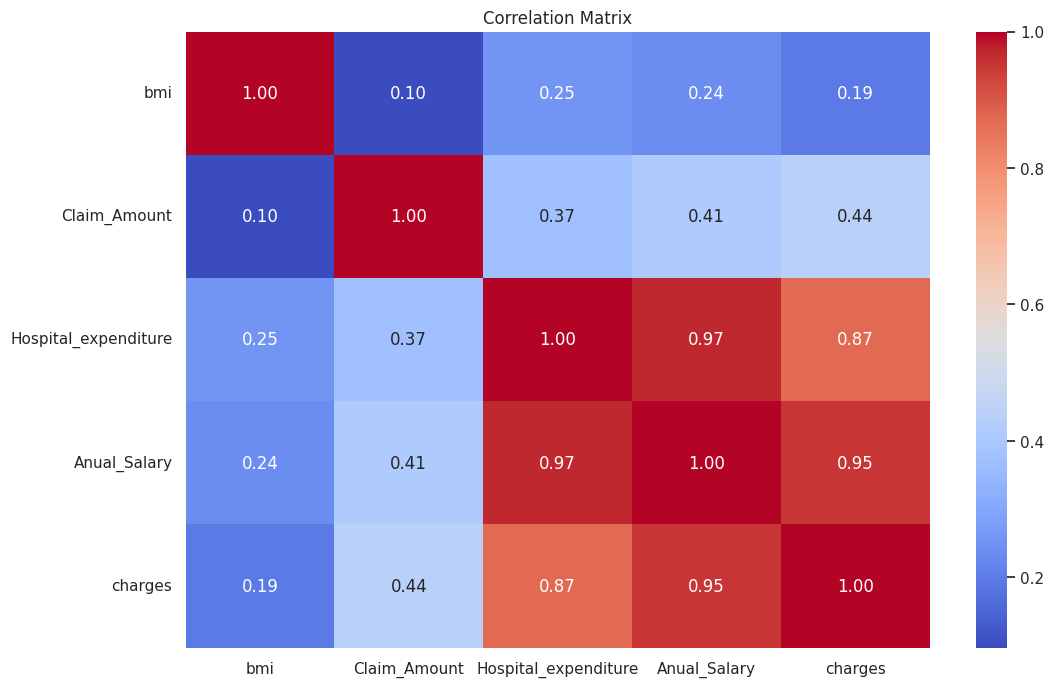

In [43]:
# Convert to Pandas DataFrame for plotting
pandas_data = data.toPandas()

# Select only numeric columns for the correlation matrix
numeric_df = pandas_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

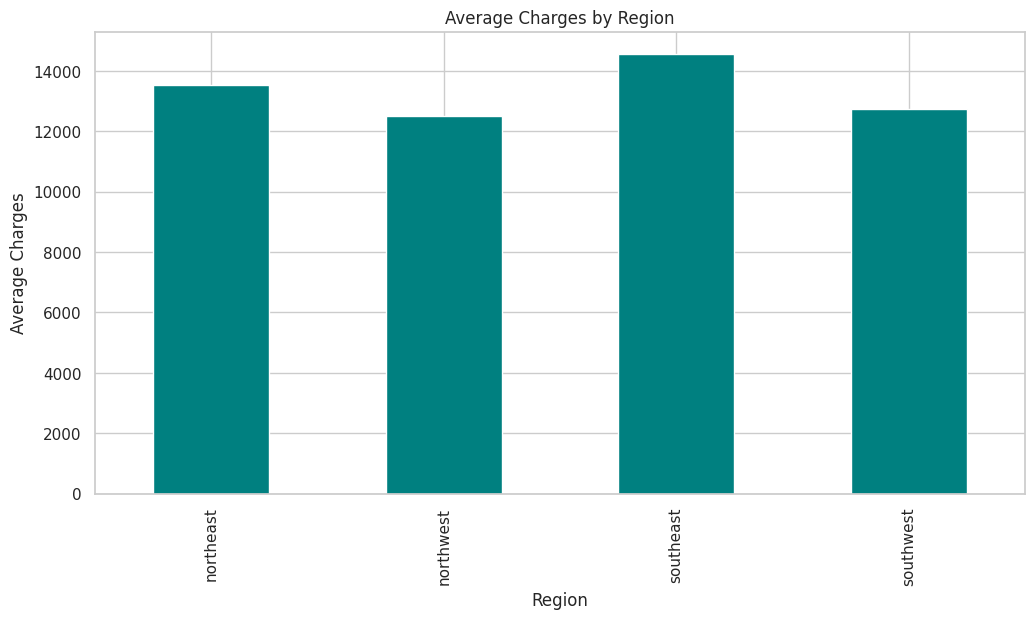

In [42]:
#Analysis of Charges by Region
plt.figure(figsize=(12, 6))
pandas_data.groupby('region')['charges'].mean().plot(kind='bar', color='teal')
plt.title('Average Charges by Region')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.show()


In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [16]:
# Encode categorical variables
indexers = [StringIndexer(inputCol=column, outputCol=column + "_index").fit(data)
            for column in ["sex", "smoker", "region"]]

In [18]:
# Assemble features into a vector
feature_cols = [col for col in data.columns if col not in ["charges", "sex", "smoker", "region"]]
feature_cols.extend(["sex_index", "smoker_index", "region_index"])
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [19]:
# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

In [20]:
# Models
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="charges")
dt = DecisionTreeRegressor(featuresCol="scaledFeatures", labelCol="charges")
rf = RandomForestRegressor(featuresCol="scaledFeatures", labelCol="charges")

In [21]:
# Pipelines
lr_pipeline = Pipeline(stages=indexers + [assembler, scaler, lr])
dt_pipeline = Pipeline(stages=indexers + [assembler, scaler, dt])
rf_pipeline = Pipeline(stages=indexers + [assembler, scaler, rf])

In [23]:
# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [24]:
# Fit the models
lr_model = lr_pipeline.fit(train_data)
dt_model = dt_pipeline.fit(train_data)
rf_model = rf_pipeline.fit(train_data)

In [25]:
# Make predictions
lr_predictions = lr_model.transform(test_data)
dt_predictions = dt_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)

In [26]:
# Evaluate the models
evaluator = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="rmse")
lr_rmse = evaluator.evaluate(lr_predictions)
dt_rmse = evaluator.evaluate(dt_predictions)
rf_rmse = evaluator.evaluate(rf_predictions)


In [27]:
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

Linear Regression RMSE: 1010.8283397208049
Decision Tree RMSE: 873.6367741132907
Random Forest RMSE: 894.1438307863344
